# 1. Detección de fraude en transacciones con tarjetas de crédito

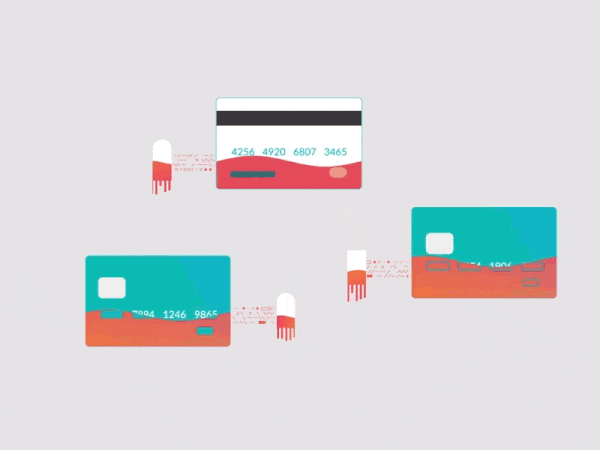

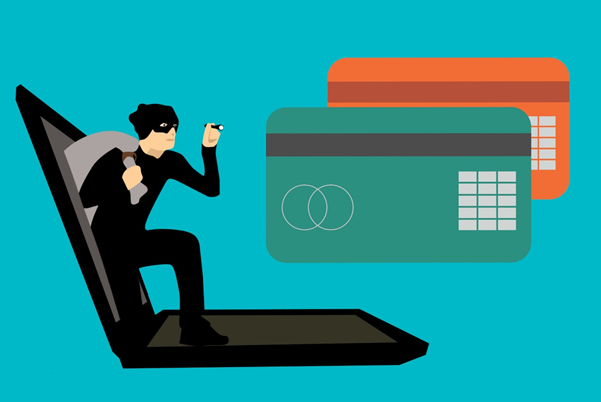

Desde los sectores tradicionales hasta los emergentes, no hay un solo negocio que sea completamente inmune al fraude.

Algunos estudios muestran que los fraudes de varios tipos podrían costar a las empresas entre el 1 % y el 1,75 % de sus ventas anuales.


Como uno de los tipos más comunes de actividades fraudulentas, **el fraude de transacciones con tarjetas de crédito afecta a alrededor de 127 millones de personas, o aproximadamente $8 mil millones en intentos de cargos fraudulentos en las tarjetas de crédito y débito de los estadounidenses.**

Por lo tanto, es imperativo que las compañías de tarjetas de crédito comprendan las características de una transacción fraudulenta y desarrollen modelos predictivos para la prevención del fraude y de esta manera señalar actividades potencialmente riesgosas.


Es importante reconocer las transacciones fraudulentas para que a los clientes no se les cobre por artículos que no compraron.


**El fraude generalmente ocurre cuando alguien obtiene los números de su tarjeta de crédito o débito a través de sitios web desprotegidos o mediante un esquema de robo de identidad para obtener dinero o propiedad de manera fraudulenta.** Debido a la frecuencia con la que ocurre y el daño potencial que puede causar tanto a las personas como a las instituciones financieras, es fundamental tomar medidas preventivas y reconocer cuándo una transacción es fraudulenta.


## Acerca del conjunto de datos
Conjunto de datos de transacciones de tarjetas de crédito que contiene transacciones legítimas y fraudulentas desde junio de 2020 hasta agosto de 2020. Cubre tarjetas de crédito de 1000 clientes que realizan transacciones con un grupo de 800 comerciantes.


- **index**: Identificador único para cada fila (Unique Identifier for each row)
- **transdatetrans_time**: Fecha y hora de la transacción (Transaction DateTime)
- **cc_num**: Número de tarjeta de crédito del cliente (Credit Card Number of Customer)
- **merchant**: Nombre del comerciante (Merchant Name)
- **category**: Categoría de comerciante (Category of Merchant)
- **amt**: Importe de la transacción (Amount of Transaction)
- **first**: Nombre del titular de la tarjeta de crédito (First Name of Credit Card Holder)
- **last**: Apellido del titular (Last Name of Credit Card Holder)
- **gender**: sexo del titular (Gender of Credit Card Holder)
- **street**: dirección del titular (Street Address of Credit Card Holder)
- **city**: Ciudad del titular (City of Credit Card Holder)
- **state**: Estado del titular (State of Credit Card Holder)
- **zip**: código postal de EEUU del titular de la tarjeta de crédito (Zip of Credit Card Holder)
- **lat**: Ubicación, latitud(Latitude Location of Credit Card Holder)
- **long**: Ubicación, longitud (Longitude Location of Credit Card Holder)
- **city_pop**: Población de la ciudad del titular de la tarjeta de crédito (Credit Card Holder's City Population)
- **job**: trabajo del titular (Job of Credit Card Holder)
- **dob**: Fecha de nacimiento del titular (Date of Birth of Credit Card Holder)
- **trans_num**: Número de transacción (Transaction Number)
- **unix_time**: Hora en UNIX de la transacción (UNIX Time of transaction)
- **merch_lat**: Ubicación, latitud del comerciante (Latitude Location of Merchant)
- **merch_long**: Ubicación, longitud del comerciante  (Longitude Location of Merchant)
- **is_fraud**: Indicador de fraude (Fraud Flag ) <--- Target Class

## Fuente de simulación
Generado usando Sparkov Data Generation | Herramienta Github creada por Brandon Harris.
https://github.com/namebrandon/Sparkov_Data_Generation


In [ ]:
#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
from scipy import stats
from scipy.stats import norm, skew
from matplotlib.pyplot import figure

In [ ]:
#Cargar el Dataset
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#Leer el Dataset
%cd '/content/gdrive/MyDrive/CoderHouse/Data_Science'
creditcard = pd.read_csv('fraud.csv')

/content/gdrive/MyDrive/CoderHouse/Data_Science


In [ ]:
#Mostrar el Dataset
creditcard

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,199996,3/1/2020 0:02,3.585740e+15,fraud_Kuvalis Ltd,gas_transport,45.60,James,Greene,M,082 Hernandez Bypass Apt. 886,...,34.2956,-99.7494,3202,"Librarian, public",3/18/1998,9726c00bd873467853c3af1b2f0abe8d,1362096171,33.913777,-100.466829,0
199997,199997,3/1/2020 0:06,3.512370e+15,fraud_Bartoletti-Wunsch,gas_transport,57.23,Francisco,Kemp,M,9554 Flores Drive,...,38.4305,-90.3870,35439,Land/geomatics surveyor,3/31/1985,b0762189a450a720f4ee4547fcf6fc7f,1362096363,37.860662,-90.534356,0
199998,199998,3/1/2020 0:07,4.229730e+15,fraud_Welch Inc,misc_net,7.90,Tyler,Mills,M,7838 Jason Squares,...,37.6848,-85.8784,48194,Surgeon,5/3/1990,74fc56abcfe99529b5ebf42a9eb380d5,1362096427,38.119560,-86.804391,0
199999,199999,3/1/2020 0:07,4.390970e+18,fraud_Dooley-Thompson,misc_net,4.52,Kyle,Simmons,M,8149 Harris Divide,...,35.6174,-97.5583,640470,Advertising copywriter,6/24/1966,9ca17325b650b1a6e6acae3fed656d51,1362096456,35.835027,-98.513300,0


In [ ]:
creditcard.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
creditcard.drop_duplicates(inplace=True)

No faltan datos en el conjunto y también se eliminaron cualquier observación duplicada.

In [ ]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb


## Análisis de variables numéricas

In [ ]:
creditcard.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,200001.000000,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,2.000010e+05,2.000010e+05,200001.000000,200001.000000,200001.000000
mean,100000.000000,4.195740e+17,71.122196,48797.818876,38.535025,-90.209092,8.880481e+04,1.343728e+09,38.536209,-90.210839,0.008345
std,57735.459931,1.311470e+18,144.445241,26864.172528,5.082839,13.736120,3.018709e+05,1.587880e+07,5.115922,13.749521,0.090969
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,50000.000000,1.800360e+14,9.710000,26237.000000,34.620500,-96.790900,7.410000e+02,1.327877e+09,34.723916,-96.867821,0.000000
50%,100000.000000,3.519610e+15,47.960000,48174.000000,39.354300,-87.476900,2.435000e+03,1.330444e+09,39.361998,-87.454358,0.000000
75%,150000.000000,4.642260e+15,83.520000,72011.000000,41.940400,-80.158000,2.032800e+04,1.359547e+09,41.956494,-80.236912,0.000000
max,200000.000000,4.992350e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.362096e+09,66.659242,-66.950902,1.000000


La primer columna (Unnamed) es solo la numeracion de las filas del dataset, por lo que no sirven para el analisis.
Además, latitud y longitud no son medidas numericas, como consecuecia, se van  omitir en el análisis.
Por lo que estariamos en presecia de datos de monto de transaccion, población y la variable objetivo, si es fraude o no.




In [ ]:
#Eliminando columna sin nombre
creditcard.drop("Unnamed: 0",axis=1,inplace=True)
creditcard.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
creditcard.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,2.000010e+05,2.000010e+05,200001.000000,200001.000000,200001.000000
mean,4.195740e+17,71.122196,48797.818876,38.535025,-90.209092,8.880481e+04,1.343728e+09,38.536209,-90.210839,0.008345
std,1.311470e+18,144.445241,26864.172528,5.082839,13.736120,3.018709e+05,1.587880e+07,5.115922,13.749521,0.090969
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,1.800360e+14,9.710000,26237.000000,34.620500,-96.790900,7.410000e+02,1.327877e+09,34.723916,-96.867821,0.000000
50%,3.519610e+15,47.960000,48174.000000,39.354300,-87.476900,2.435000e+03,1.330444e+09,39.361998,-87.454358,0.000000
75%,4.642260e+15,83.520000,72011.000000,41.940400,-80.158000,2.032800e+04,1.359547e+09,41.956494,-80.236912,0.000000
max,4.992350e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.362096e+09,66.659242,-66.950902,1.000000


In [ ]:
#Creando variable de edad a partir de fechas de transacción y fecha de nacimiento.
creditcard['trans_date_trans_time']=pd.to_datetime(creditcard['trans_date_trans_time'])
creditcard['trans_date']=creditcard['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
creditcard['trans_date']=pd.to_datetime(creditcard['trans_date'])
creditcard['dob']=pd.to_datetime(creditcard['dob'])


In [ ]:
creditcard["age"] = creditcard["trans_date_trans_time"]-creditcard["dob"]
creditcard["age"]=creditcard["age"].astype('timedelta64[Y]')
creditcard["age"].head()

0    30.0
1    40.0
2    56.0
3    51.0
4    32.0
Name: age, dtype: float64

In [ ]:
creditcard.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,2.000010e+05,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000
mean,4.195740e+17,71.122196,48797.818876,38.535025,-90.209092,8.880481e+04,1.343728e+09,38.536209,-90.210839,0.008345,45.259424
std,1.311470e+18,144.445241,26864.172528,5.082839,13.736120,3.018709e+05,1.587880e+07,5.115922,13.749521,0.090969,17.387578
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000,13.000000
25%,1.800360e+14,9.710000,26237.000000,34.620500,-96.790900,7.410000e+02,1.327877e+09,34.723916,-96.867821,0.000000,32.000000
50%,3.519610e+15,47.960000,48174.000000,39.354300,-87.476900,2.435000e+03,1.330444e+09,39.361998,-87.454358,0.000000,43.000000
75%,4.642260e+15,83.520000,72011.000000,41.940400,-80.158000,2.032800e+04,1.359547e+09,41.956494,-80.236912,0.000000,56.000000
max,4.992350e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.362096e+09,66.659242,-66.950902,1.000000,95.000000


La distribución de edad es visiblemente diferente entre 2 tipos de transacciones. En las transacciones normales, hay 2 picos en la edad de 37-38 y 49-50, mientras que en las transacciones fraudulentas, la distribución por edad es un poco más suave y el segundo pico incluye un grupo de edad más amplio de 50-65. Esto sugiere que las personas mayores son potencialmente más propensas al fraude.

In [ ]:
creditcard = creditcard.reset_index(drop=True)

In [ ]:
creditcard.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,2.000010e+05,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000
mean,4.195740e+17,71.122196,48797.818876,38.535025,-90.209092,8.880481e+04,1.343728e+09,38.536209,-90.210839,0.008345,45.259424
std,1.311470e+18,144.445241,26864.172528,5.082839,13.736120,3.018709e+05,1.587880e+07,5.115922,13.749521,0.090969,17.387578
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000,13.000000
25%,1.800360e+14,9.710000,26237.000000,34.620500,-96.790900,7.410000e+02,1.327877e+09,34.723916,-96.867821,0.000000,32.000000
50%,3.519610e+15,47.960000,48174.000000,39.354300,-87.476900,2.435000e+03,1.330444e+09,39.361998,-87.454358,0.000000,43.000000
75%,4.642260e+15,83.520000,72011.000000,41.940400,-80.158000,2.032800e+04,1.359547e+09,41.956494,-80.236912,0.000000,56.000000
max,4.992350e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.362096e+09,66.659242,-66.950902,1.000000,95.000000


In [ ]:
import datetime as dt
creditcard['age']=dt.date.today().year-pd.to_datetime(creditcard['dob']).dt.year
creditcard['trans_month'] = pd.DatetimeIndex(creditcard['trans_date']).month
creditcard['trans_year'] = pd.DatetimeIndex(creditcard['trans_date']).year
import calendar
creditcard['Month_name'] = creditcard['trans_month'].apply(lambda x: calendar.month_abbr[x])
creditcard['hour']=pd.to_datetime(creditcard['trans_date_trans_time']).dt.hour
creditcard['day']=pd.to_datetime(creditcard['trans_date_trans_time']).dt.dayofweek
creditcard['month']=pd.to_datetime(creditcard['trans_date_trans_time']).dt.month

In [ ]:
creditcard.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,trans_month,trans_year,hour,day,month
count,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,2.000010e+05,2.000010e+05,200001.000000,200001.000000,200001.000000,200001.000000,200001.000000,200001.000000,200001.000000,200001.000000,200001.000000
mean,4.195740e+17,71.122196,48797.818876,38.535025,-90.209092,8.880481e+04,1.343728e+09,38.536209,-90.210839,0.008345,49.679952,1.476403,2019.499998,12.802081,2.952475,1.476403
std,1.311470e+18,144.445241,26864.172528,5.082839,13.736120,3.018709e+05,1.587880e+07,5.115922,13.749521,0.090969,17.372603,0.499514,0.500001,6.824641,2.164527,0.499514
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000,18.000000,1.000000,2019.000000,0.000000,0.000000,1.000000
25%,1.800360e+14,9.710000,26237.000000,34.620500,-96.790900,7.410000e+02,1.327877e+09,34.723916,-96.867821,0.000000,36.000000,1.000000,2019.000000,7.000000,1.000000,1.000000
50%,3.519610e+15,47.960000,48174.000000,39.354300,-87.476900,2.435000e+03,1.330444e+09,39.361998,-87.454358,0.000000,48.000000,1.000000,2019.000000,14.000000,3.000000,1.000000
75%,4.642260e+15,83.520000,72011.000000,41.940400,-80.158000,2.032800e+04,1.359547e+09,41.956494,-80.236912,0.000000,61.000000,2.000000,2020.000000,19.000000,5.000000,2.000000
max,4.992350e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.362096e+09,66.659242,-66.950902,1.000000,99.000000,3.000000,2020.000000,23.000000,6.000000,3.000000


## Distribución de las transacciones fraudulentas en el espectro temporal


In [ ]:
fraud_or_not = creditcard["is_fraud"].value_counts().tolist()
fig = px.pie(values=creditcard['is_fraud'].value_counts(), names=['Genuina','Fraude'] , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraude vs Genuina")
fig.show()

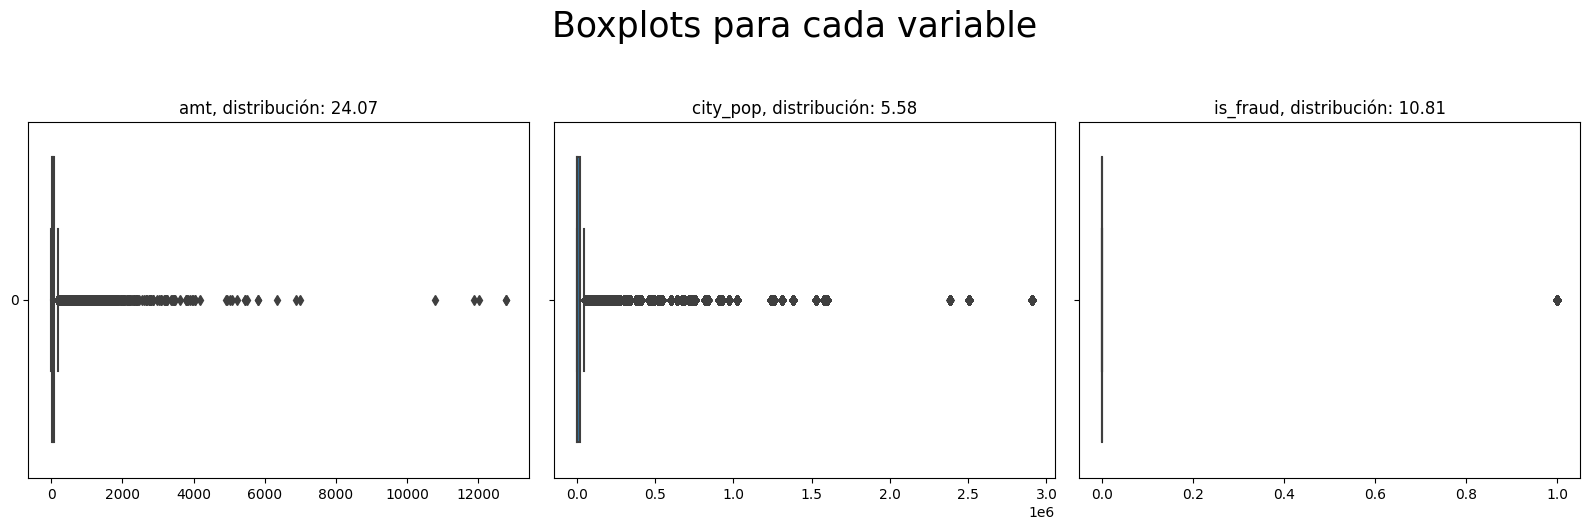

In [ ]:
# boxplots de todas las variables numéricas
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,5))
    fig.suptitle(suptitle,y=1.05, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', distribución: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

numeric_columns= ['amt', 'city_pop','is_fraud']
boxplots_custom(dataset=creditcard, columns_list=numeric_columns, rows=1, cols=3, suptitle='Boxplots para cada variable')

plt.tight_layout()

**Interpretación:**

La mayoría de las transacciones están limitadas dentro de un rango muy pequeño, aunque las transacciones de grandes sumas están  presentes, que probablemente sean transacciones fraudulentas.

---



In [ ]:
#creditcard.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  200001 non-null  datetime64[ns]
 1   cc_num                 200001 non-null  float64       
 2   merchant               200001 non-null  object        
 3   category               200001 non-null  object        
 4   amt                    200001 non-null  float64       
 5   first                  200001 non-null  object        
 6   last                   200001 non-null  object        
 7   gender                 200001 non-null  object        
 8   street                 200001 non-null  object        
 9   city                   200001 non-null  object        
 10  state                  200001 non-null  object        
 11  zip                    200001 non-null  int64         
 12  lat                    200001 non-null  floa

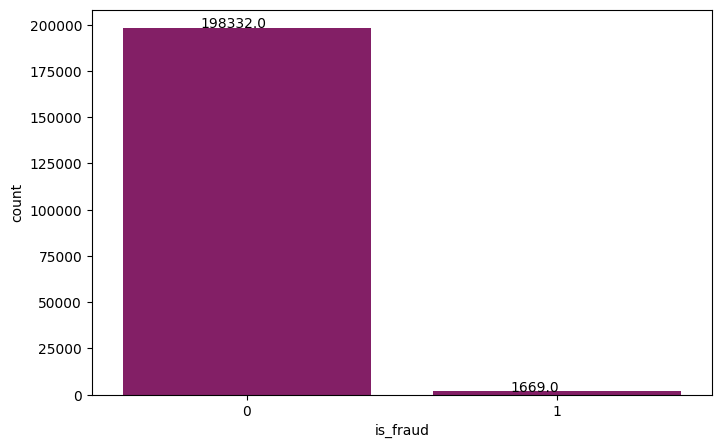

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=creditcard,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Interpretación:**

Solo alrededor de 1700 entradas representan transacciones fraudulentas de casi 200 mil entradas, por lo que estamos ante un conjunto de datos desequilibrado.


---




## Conclusión

•	Ciertas columnas numéricas no son necesarias para el modelado y, por lo tanto, pueden eliminarse.

•	Además, muchos de los datos están muy sesgados.

•	La proporción de transacciones sin fraude es mucho mayor que las transacciones fraudulentas, por lo que estamos viendo un conjunto de datos desequilibrado.




---



# Modelado y predicción de datos

Con base al EDA anterior, descubrimos que las características que incluyen:
* el monto de la transacción,
* la edad del titular de la tarjeta de crédito,
* la categoría de gasto,
* el tiempo de la transacción
* y las ubicaciones

tienen diversos grados de correlación con el fraude con tarjeta de crédito.

Esto nos ayuda a elegir qué características queremos incluir en nuestros modelos de datos. Se entrenaría los modelos en el conjunto de datos que analizamos anteriormente y luego se usa el conjunto de datos para evaluar el rendimiento del modelo.

Como los modelos de datos necesitan entrada numérica, necesitamos convertir algunas de las observaciones categóricas en numéricas. Para ubicaciones de transacciones y ubicaciones de comerciantes, ya tenemos los datos longitudinales y latitudinales. Pero para las categorías de compras, necesitamos convertirlas en variables usando pandas.get_dummies.


# Regresión logística

In [ ]:
#subconjunto de los datos de entrenamiento para incluir solo las funciones que necesitamos
train=creditcard[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convertir categoría a dummy variables
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [ ]:
#conjunto de datos de prueba
%cd '/content/gdrive/MyDrive/CoderHouse/Data_Science'
test = pd.read_csv('fraudTest.csv')

/content/gdrive/MyDrive/CoderHouse/Data_Science


In [ ]:
import datetime as dt
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convertir categoría a dummy variables
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

Con ambos conjuntos de datos listos, se procede a construir modelos con ellos.



## 1.Regresión logística combinada con la matriz de confusión para evaluar el modelo.



Como es muy común con los datos de fraude, siempre existe el problema del desequilibrio de clases donde los casos reales de fraude son mucho menos que los casos normales y constituyen solo una parte muy pequeña del conjunto de datos. Para contrarrestar este desequilibrio, se utiliza el método SMOTE (Synthetic Minority Oversampling Technique) para volver a muestrear el conjunto de datos de entrenamiento para que el modelo pueda entrenarse con datos más equilibrados para obtener mejores resultados.

Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     99599
           1       0.05      0.73      0.10       402

    accuracy                           0.95    100001
   macro avg       0.53      0.84      0.53    100001
weighted avg       1.00      0.95      0.97    100001

Porcentaje de No-Fraude en datos de prueba: 0.996


Matriz de confusión:



Text(0.5, 1.0, 'Matriz de confusión')

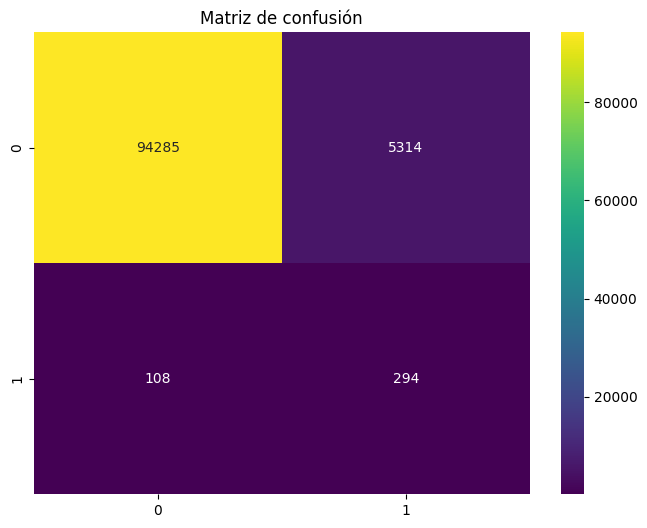

In [ ]:
#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Informe de clasificación:\n', classification_report(y_test, predicted))

print('Porcentaje de No-Fraude en datos de prueba:', 1-round(y_test.sum()/len(y_test),4))
print('\n')
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Matriz de confusión:\n')
#sns.heatmap(conf_mat, annot=True, fmt="d", cbar = False)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat, cmap = 'viridis',annot = True, fmt='d')
ax.set_title('Matriz de confusión')

En el modelo de regresión logística anterior, el recall es de alrededor de 0,73 y la precisión general del modelo es de alrededor de 0,95; que es inferior a la proporción real de casos sin fraude en el conjunto de datos de prueba,test (0.996). Ambas métricas sugieren que el modelo no aporta mucho a la detección del fraude, por lo que hay un gran número de falsos positivos.

Se deberia probar otro algoritmo.

Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99599
           1       0.85      0.61      0.71       402

    accuracy                           1.00    100001
   macro avg       0.93      0.80      0.86    100001
weighted avg       1.00      1.00      1.00    100001



Matriz de confusión:



Text(0.5, 1.0, 'Matriz de confusión')

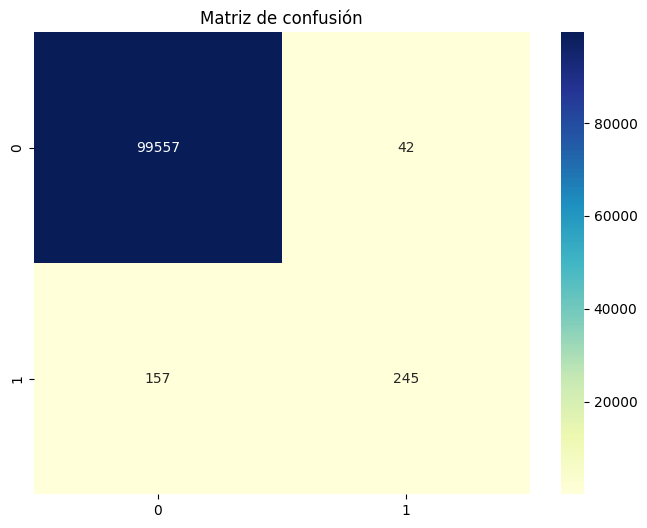

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test)


print('Informe de clasificación:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)

print('\n')
print('Matriz de confusión:\n')
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Matriz de confusión')

Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99599
           1       0.62      0.75      0.68       402

    accuracy                           1.00    100001
   macro avg       0.81      0.87      0.84    100001
weighted avg       1.00      1.00      1.00    100001



Matriz de confusión:



Text(0.5, 1.0, 'Matriz de confusión')

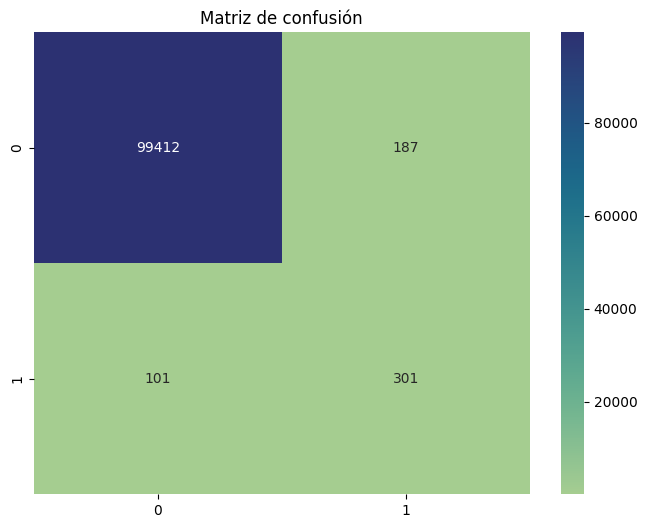

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
predicted=model3.predict(X_test)

print('Informe de clasificación:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)

print('\n')
print('Matriz de confusión:\n')
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat, cmap = 'crest',annot = True, fmt='d')
ax.set_title('Matriz de confusión')



Las métricas anteriores muestran que aunque el modelo Random Forest tiene un recall ligeramente menor que la regresión logística, tiene una mejor accuracy y precision.

Aunque todavía necesita mejoras, sirve como una base mucho mejor que el modelo de regresión logística para futuras implementaciones.

En comparacion el decision tree tiene mejor recall que el Random Forest, pero menor precision y un f1 menor que el random forest



In [ ]:
y =y_train
X =X_train

In [ ]:
X

array([[4.97000e+00, 2.86540e+04, 3.60788e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.07230e+02, 9.91600e+04, 4.88878e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.20110e+02, 8.32520e+04, 4.21808e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [7.90000e+00, 4.27010e+04, 3.76848e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.52000e+00, 7.31340e+04, 3.56174e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [8.18300e+01, 5.50650e+04, 4.45274e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
len(X)

200001

In [ ]:
len(y)

200001



---



# Crossvalidation y mejora de modelos de ML

In [ ]:
#Separamos en train y test
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a synthetic dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, weights = [.7,.2,.1], n_classes=3, random_state=42)

proportions = np.bincount(y)

print(proportions)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with max_depth=1
clf = DecisionTreeClassifier(max_depth=1, random_state=42)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Check the accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

print('Accuracy:', classification_report(y_test, y_pred))

[198332   1669]
Accuracy: 0.9919002024949376
Accuracy:               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39677
           1       0.00      0.00      0.00       324

    accuracy                           0.99     40001
   macro avg       0.50      0.50      0.50     40001
weighted avg       0.98      0.99      0.99     40001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



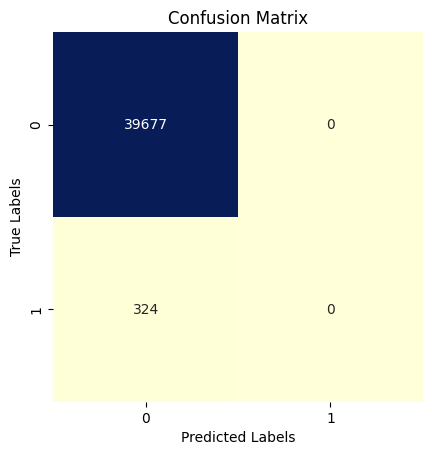

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# Create a confusion matrix using Seaborn
confusion_matrix = sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    square=True,
    fmt="d"
)

# Set labels, title, and ticks
confusion_matrix.set_xlabel("Predicted Labels")
confusion_matrix.set_ylabel("True Labels")
confusion_matrix.set_title("Confusion Matrix")

# Add labels to the sides of the matrix
tick_labels = ["0", "1", "2"]
#confusion_matrix.xaxis.set_ticklabels(tick_labels)
#confusion_matrix.yaxis.set_ticklabels(tick_labels)

# Show the confusion matrix
plt.show()

Se cae en underfitting por la simpleza del algoritmo de clasificación, se prueba con un max_depth de none

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Increase model complexity
clf = DecisionTreeClassifier(max_depth=None, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy after increasing model complexity:', accuracy_score(y_test, y_pred))

# Perform feature engineering (create interaction features)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the classifier with the new features
clf.fit(X_train_poly, y_train)
y_pred_poly = clf.predict(X_test_poly)
print('Accuracy after feature engineering:', accuracy_score(y_test, y_pred_poly))


Accuracy after increasing model complexity: 0.9971750706232344
Accuracy after feature engineering: 0.9964500887477813


Se usan dos modelos: un árbol de decisión más complejo y un modelo con más variable creando features polinómicos   

Se calculan ambas métricas sobre el conjunto de train y test para comprobar si caemos en overfit   

In [ ]:
# Create a decision tree classifier with no restrictions
clf_overfit = DecisionTreeClassifier(max_depth=None, random_state=42)

# Fit the classifier with the new features
clf_overfit.fit(X_train_poly, y_train)

# Predict on the train set
y_pred_train = clf_overfit.predict(X_train_poly)
print('Train accuracy:', accuracy_score(y_train, y_pred_train))

# Predict on the test set
y_pred_test = clf_overfit.predict(X_test_poly)
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

Train accuracy: 1.0
Test accuracy: 0.9964500887477813


In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
model = DecisionTreeClassifier(max_depth=None, random_state=42)


scores = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy',
                        return_train_score=True)

print('Cross-Validation in train set:', np.mean(scores['train_score']))
print('Cross-Validation in Validation set:', np.mean(scores['test_score']))


Cross-Validation in train set: 1.0
Cross-Validation in Validation set: 0.9962500000000001


In [ ]:
scores

{'fit_time': array([1.54608059, 1.41439843, 1.93228817, 2.13615608, 1.48593974]),
 'score_time': array([0.00731182, 0.00871921, 0.00864959, 0.00583243, 0.00571299]),
 'test_score': array([0.99659375, 0.995875  , 0.99609375, 0.99584375, 0.99684375]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified 5-fold cross validation
scores = cross_validate(model, X_train_poly, y_train, cv=stratified_kfold, scoring='accuracy',
                        return_train_score=True)

print('Cross-Validation in train set :', np.mean(scores['train_score']))
print('Cross-Validation in Validation set:', np.mean(scores['test_score']))

Cross-Validation in train set : 1.0
Cross-Validation in Validation set: 0.99609375


El modelo predice de forma adecuada el conjunto test

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the models and their respective hyperparameters
model = DecisionTreeClassifier()
params = {
    'max_depth': [5, None],
    'min_samples_leaf': [1, 10]
          }


# StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)


gs = GridSearchCV(model, params, cv=stratified_kfold, return_train_score= True, verbose = 2)
gs.fit(X_train_poly, y_train)


print("Best Parameters:", gs.best_params_)
print("Best Accuracy:", gs.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   8.0s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   8.6s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   8.9s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   7.7s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   8.8s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   8.1s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   8.4s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   9.7s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   7.7s
[CV] END ...................max_depth=5, min_samples_leaf=10; total time=   8.9s
[CV] END .................max_depth=None, min_samples_leaf=1; total time=  45.4s
[CV] END .................max_depth=None, min_sam

In [ ]:
gs.best_estimator_

DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
best_classifier = gs.best_estimator_
y_pred = best_classifier.predict(X_test_poly)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9967500812479688


In [ ]:
import pandas as pd
results = pd.DataFrame(gs.cv_results_)

results[['params', 'mean_test_score', 'mean_train_score']].head(20)

,params,mean_test_score,mean_train_score
0,"{'max_depth': 5, 'min_samples_leaf': 1}",0.996381,0.996684
1,"{'max_depth': 5, 'min_samples_leaf': 10}",0.996375,0.996589
2,"{'max_depth': None, 'min_samples_leaf': 1}",0.996194,1.000000
3,"{'max_depth': None, 'min_samples_leaf': 10}",0.996700,0.997894
